<a href="https://colab.research.google.com/github/paggiLuca/Python/blob/main/Esercizio_Pandas_Matplotlib_MongoDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - 2 
Si colleghi al proprio database
Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [ ]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv")
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


3. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
#df.drop(columns=["N","address","grades","restaurant_id"])
#df.filter
df.drop(df.columns.difference(["borough", "cuisine","name"]),1,inplace = True)
df


4. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
df[df["borough"]=="Missing"].count()["name"]


51

5. Sostituisca alla parola ‘Missing’ il valore null

In [ ]:
df.replace("missing",a.NaN,inplace = True)
df

6. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df.dropna(subset=["borough"],inplace = True)
df


,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


7. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina
che ha più ristoranti

In [ ]:
df["cuisine"].value_counts()


American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Chilean               1
Polynesian            1
Creole/Cajun          1
Californian           1
Name: cuisine, Length: 85, dtype: int64

8. Visualizzi il tipo di cucina con più ristoranti

In [ ]:
c = df["cuisine"].value_counts()
c[c == c.max()]

American    6183
Name: cuisine, dtype: int64

9. Visualizzi un grafico a barre con i primi 10 tipi di cucina

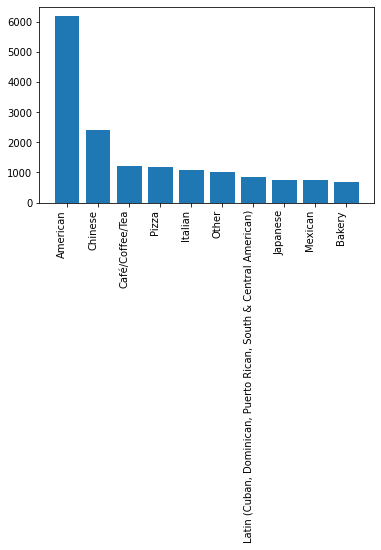

In [ ]:
fig, ax = plt.subplots()
fig.autofmt_xdate(rotation=90)
ax.bar(c.index[:10],c[:10])
plt.show()

10. Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
df["borough"].value_counts()

Manhattan        10259
Brooklyn          6086
Queens            5656
Bronx             2338
Staten Island      969
Missing             51
Name: borough, dtype: int64

11. Visualizzi i dati precedenti in un grafico a torta

In [ ]:
a =df["cuisine"].value_counts()
fig, ax = plt.subplots()
ax.pie(a,autopct = "%.2f%%")

12. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.

In [ ]:

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(13)
fig.autofmt_xdate(rotation=90)
ax[0].bar(c.index,a.index)
ax[0].set_title("PRIMI 10 TIPI DI CUCINA", fontsize=17)
ax[0].set_xlabel("CUCINE", fontsize=15)
ax[0].set_ylabel("RISTORANTI", fontsize=15)
ax[1].pie(a)
ax[1].set_title("RISTORANTI PER OGNI QUARTIERE", fontsize=17)

ax[1].pie(a,autopct="%1.2f%%")
fig.tight_layout()
plt.show()
plt.savefig("risultati.pdf")


<Figure size 432x288 with 0 Axes>

13. crei un nuovo dataframe sostituendo la parola &#39;non American&#39; a tutti i tipi di cucina che non sono
americani

In [ ]:
df["cuisine"][df["cuisine"]!="American"]="non American"
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


14. visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato
deve essere il seguente:

In [ ]:
df.groupby(["borough","cuisine"]).count()

name
borough       cuisine              
Bronx         African            31
              American          411
              Armenian            2
              Asian               4
              Bagels/Pretzels     3
...                             ...
Staten Island Spanish            19
              Steak               1
              Tex-Mex             5
              Thai                1
              Turkish             1

[365 rows x 1 columns]

16. crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una
colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve
essere il seguente:

In [ ]:
df=df.unstack().reset_index(axis=1)
df

18. resetti l&#39;indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato
deve essere il seguente:

20. Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti
americani ed una per quelli non americani. Il risultato deve essere il seguente: